# Logistic regression as a perceptron

* [Cost function](#Cost-function)
* [Implementation](#Implementation)

## Small Linear Algebra recap
To multiply two matrices, the number of columns of the first matrix must equal the number of rows of the second matrix.

#### Matrix x Vector multiplication (3x2)*(2x1):
\begin{equation*}
\begin{bmatrix}  a & b \newline   c & d \newline   e & f \end{bmatrix} *\begin{bmatrix}  x \newline   y \newline  \end{bmatrix} =\begin{bmatrix}  a*x + b*y \newline   c*x + d*y \newline   e*x + f*y\end{bmatrix}
\end{equation*}

#### Matrix x Matrix multiplication, dot product (3x2)*(2x2):
\begin{equation*}
\begin{bmatrix}  a & b \newline   c & d \newline   e & f \end{bmatrix} *\begin{bmatrix}  w & x \newline   y & z \newline  \end{bmatrix} =\begin{bmatrix}  a*w + b*y & a*x + b*z \newline   c*w + d*y & c*x + d*z \newline   e*w + f*y & e*x + f*z\end{bmatrix}
\end{equation*}

#### In deep learning:
<img src="img/lalgebra_recap.png" width=700 height=500></img>

# Logistic regression as a perceptron

<img src="img/perceptron.png" width=600 height=500></img>

Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Unlike linear regression which outputs continuous number values, logistic regression transforms its output using the logistic sigmoid function to return a probability value which can then be mapped to two or more discrete classes. It is also actually a very simple Neural Network of one perceptron. Let's take a look a the mathematical expression of the algorithm.

\begin{equation*}
z^{(i)} = W^T x^{(i)} + b
\end{equation*}
\begin{equation*}
\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})
\end{equation*}
Sigmoid activation: \begin{equation*}sigmoid(z) = \frac{1} {1 + e^{-z}}\end{equation*}

## Complexity: O(n * epoch) = O(n)

Logistic regression has to run on all examples of the training set at least once, so the cost is O(n).

## Cost function

Instead of using the MSE as with Linear Regression, we will use Cross-entropy, also called **log-loss** as a way to measure how well our model is predicting the class. Log-loss measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high loss value. A perfect model would have a log loss of 0. The formula is this:

\begin{equation*}
L(a^{(i)}, y^{(i)}) = -y^{(i)}log(a^{(i)})-(1-y^{(i)})log(1-a^{(i)})
\end{equation*}

And then for all training samples the cost is computed as:
\begin{equation*}
J = \frac{1}{m} \sum_{i=1}^{m} L(a^{(i)}, y^{(i)})
\end{equation*}

## Implementation

The steps are going to be pretty similar to linear regression:
* Initialize parameters
* Learn parameters by minimizing the cost by looping:
  * Calculate current loss (forward propagation)
  * Calculate current gradient (backward propagation)
  * Update parameters (gradient descent)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
iris_data = iris.data
iris_labels = iris.target

**Logistic regression only works for two classes {0, 1}**. If we have more, our cost will go downhill the negative spectrum. So in order to get any strange behavior, we select only the ones with 0 and 1 labels.

In [2]:
iris_data = iris_data[iris_labels < 2]
iris_labels = iris_labels[iris_labels < 2]
print("Labels: {}...".format(iris_labels[:5]))
print("Data: {}...".format(iris_data[:5]))
print("Shape of labels: {}".format(len(iris_labels)))
print("Shape of data: {}".format(iris_labels.shape[0]))

Labels: [0 0 0 0 0]...
Data: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]...
Shape of labels: 100
Shape of data: 100


### Sigmoid

In order to map predicted values to probabilities, we use the sigmoid function. The function **maps any real value into another value between 0 and 1**. In machine learning, we use sigmoid to map predictions to probabilities.

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [7]:
print("sigmoid(0) = " + str(sigmoid(0)))
print("sigmoid(9.2) = " + str(sigmoid(10000)))

sigmoid(0) = 0.5
sigmoid(9.2) = 1.0


### Initialize parameters

Initialize the parameters `W` and `b`

In [5]:
def initialize_parameters(n_variables):
    w = np.zeros((n_variables, 1), dtype = int)
    b = 0.0
    return w, b

In [6]:
n_variables = 3
w, b = initialize_parameters(n_variables)
print ("b = " + str(b))
print ("w = " + str(w))

b = 0.0
w = [[0]
 [0]
 [0]]


### Forward propagation

In forward propagation we pass the information forward on the neural to obtain the predictions in `A`. Simply give the input to the perceptron `X` and the parameters `W`, `b` to obtain the activation output `A`. We also compute the cost to check how our model is performing. Our initial `W` and `b` will be set to zero (don't do it in NN or you won't break simmetry of output), but we will update them each iteration in the backpropagation step.

Compute:
* $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
* $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

In [7]:
def forward_prop(w, b, X, Y):
    
    m = X.shape[1]
    
    # compute activation
    A = sigmoid(np.dot(w.T, X) + b)
    
    # compute cost
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))
    
    return A, cost

### Backward propagation

In backward propagation we pass the information backward, specially the gradients. We compute the gradients with the partial derivates of the cost with respect to each parameter. This is so we can update our parameters, also called the weights.

<img src="img/backprop.png" width = 600, height = 500>

The partial derivatives of the cost with respect to `w` and `b` are as follows:

\begin{equation*}
\frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T
\end{equation*}

\begin{equation*}
\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})
\end{equation*}

In [8]:
def backward_prop(w, b, A, X, Y):
    m = X.shape[1]
    
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)
    return dw, db

In [9]:
def update_parameters(w, b, dw, db, learning_rate):
    w = w - (learning_rate * dw)
    b = b - (learning_rate * db)
    return w, b

Once we have our helper functions running, we can implement our optimization loop.

### Results

In [10]:
m_train_x = iris_data
m_train_y = iris_labels
print("Number of training examples: m_train = " + str(len(m_train_x)))
print("train_set_x shape: " + str(m_train_x.shape))
print("train_set_y shape: " + str(m_train_y.shape))

Number of training examples: m_train = 100
train_set_x shape: (100, 4)
train_set_y shape: (100,)


In this case, we have to transform the dataset to be a 4 x 150 matrix, and we got the transposed one. Let's fix it.

In [11]:
m_train_x = iris_data.T
w, b = initialize_parameters(m_train_x.shape[0])
print("train_set_x shape: " + str(m_train_x.shape))
print("weights: {}".format(w.T.shape)) # we also do transpose inside the function

train_set_x shape: (4, 100)
weights: (1, 4)


In [12]:
def logistic_regression(X, Y, num_iterations, learning_rate = 0.0002, verbose = 0):
    
    w, b = initialize_parameters(X.shape[0])
    
    w_epoch = [w]
    b_epoch = [b]
    cost_epoch = []
        
    for i in range(num_iterations):
        A, cost = forward_prop(w, b, X, Y)
        dw, db = backward_prop(w, b, A, X, Y)
        w, b = update_parameters(w, b, dw, db, learning_rate)
        
        # save results
        w_epoch.append(w)
        b_epoch.append(b)
        cost_epoch.append(cost)

        if verbose > 0:
            print("Epoch: {} Cost: {}".format(i, cost))
            if verbose > 1:
                print("- X: {}".format(X[:5]))
                print("- Weights: {}".format(w))
                print("- Predictions: {}".format(predictions[:5]))
                print("- dW: {}".format(dw[:5]))
                print("- db: {}".format(db[:5]))
        
    return cost, w, b, dw, db, cost_epoch

In [13]:
cost, w, b, dw, db, cost_epoch = logistic_regression(m_train_x, 
                                                     m_train_y, 
                                                     learning_rate = 0.0002, 
                                                     num_iterations = 1500, 
                                                     verbose = 0)

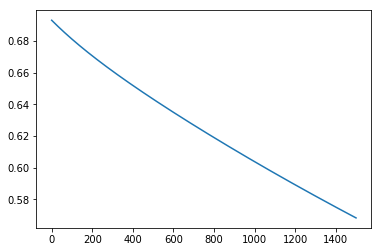

In [14]:
plt.plot(cost_epoch)

In [15]:
def predict(w, b, X):
    m = X.shape[1]

    # compute predictions with optimized parameters
    A = sigmoid(np.dot(w.T, X) + b)
    
    # convert probabilities to actual predictions (0, 1)
    y_hat = np.around(A, decimals=0)

    return y_hat

In [16]:
predictions = predict(w, b, m_train_x)

In [17]:
# Print train/test Errors
print("train accuracy: {} %".format(100 - np.mean(np.abs(predictions - m_train_y)) * 100))

train accuracy: 99.0 %


***

## Notes:

- Always check the matrix dimmensions. Consider that computing of predictions, according to the formula, `W` is transposed too.

## Links:
* None yet